In [4]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [5]:
style.use('ggplot')

In [6]:
start = dt.datetime(2017, 1, 3)
end = dt.datetime(2017, 11, 20)

In [7]:
prices = web.DataReader('AAPL', 'yahoo', start, end)['Close']

In [8]:
returns = prices.pct_change()

In [9]:
last_price = prices[-1]

In [10]:
num_simulations = 1000 
num_days = 252

In [11]:
simulation_df = pd.DataFrame()

In [12]:
for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()

In [13]:
price_series = []

In [14]:
price = last_price * (1 + np.random.normal(0, daily_vol))
price_series.append(price)    

In [15]:
for y in range(num_days):
    if count == 251:
        break
    price = price_series[count] * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    count += 1

In [16]:
simulation_df[x] = price_series

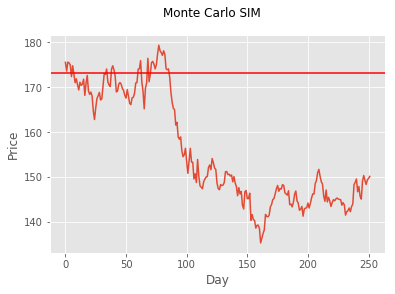

In [17]:
fig = plt.figure()
fig.suptitle('Monte Carlo SIM')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [18]:
import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots
import locale
locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

In [19]:
pv = 10000
time_horizon = 30
i =.07
additions = 10000

for year in range(time_horizon):
    ending = pv * (1+i) + additions
    print(locale.currency(ending, grouping=True))
    pv = ending

$20,700.00
$32,149.00
$44,399.43
$57,507.39
$71,532.91
$86,540.21
$102,598.03
$119,779.89
$138,164.48
$157,835.99
$178,884.51
$201,406.43
$225,504.88
$251,290.22
$278,880.54
$308,402.17
$339,990.33
$373,789.65
$409,954.92
$448,651.77
$490,057.39
$534,361.41
$581,766.71
$632,490.38
$686,764.70
$744,838.23
$806,976.91
$873,465.29
$944,607.86
$1,020,730.41


In [20]:
pv = 1000
expected_return = 0.9
volatility = .18
time_horizon = 30
annual_addition = 10000

print('\tReturn', '\t\tEnding Value'.rjust(18))
for year in range(time_horizon):
    market_return = np.random.normal(expected_return, volatility)
    fv = pv * (1 + market_return) + annual_addition
    print('\t{}'.ljust(10).format(round(market_return,4)), '\t{}'.rjust(10).format(locale.currency(fv, grouping=True)))
    pv = fv

	Return     		Ending Value
	0.9851               	$11,985.11
	0.5757               	$28,884.66
	0.8292               	$62,834.56
	0.8818               	$128,245.10
	0.8184               	$243,205.67
	0.8707               	$464,975.60
	0.716               	$807,890.11
	1.0513               	$1,667,248.01
	0.7754               	$2,969,974.72
	0.9245               	$5,725,819.89
	1.0986               	$12,026,064.15
	1.0484               	$24,644,445.84
	1.0549               	$50,652,026.44
	0.5837               	$80,225,198.50
	1.0196               	$162,035,935.69
	0.6998               	$275,437,390.75
	0.9259               	$530,483,881.17
	0.9016               	$1,008,755,654.18
	0.7933               	$1,808,964,414.67
	1.0821               	$3,766,447,467.75
	0.707               	$6,429,252,425.24
	1.2676               	$14,578,847,658.76
	1.2458               	$32,741,871,061.24
	1.0538               	$67,245,454,000.56
	0.9414               	$130,549,444,958.73
	1.0062             

### Simulate portfolio ending market value

In [21]:
sim = DataFrame()
iterations = 5000

for x in range(iterations):
    expected_return = .09
    volatility - .18
    time_horizon = 30
    pv = 10000
    annual_investment = 10000
    stream = []
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return, volatility)) + annual_investment, 2)
        
        stream.append(end)
        pv = end
        
    sim[x] = stream

In [22]:
first_five = list(range(5))
sim[first_five]

,0,1,2,3,4
0,19250.81,15402.92,18591.09,21328.28,18144.13
1,31817.51,26159.33,35992.19,33420.88,31291.06
2,49816.55,39869.48,51961.37,58786.73,35823.11
3,80361.75,58363.58,55203.65,81231.32,47178.04
4,85955.38,92700.49,61001.13,106284.19,62126.38
5,83329.59,112376.22,63058.08,130538.35,62576.41
6,96377.52,142992.33,79380.49,136029.22,93179.34
7,100618.01,169968.99,116248.94,166332.29,124711.18
8,96890.54,299580.94,138277.98,200883.52,125983.71
9,121990.18,369041.18,111513.28,196505.65,148138.98


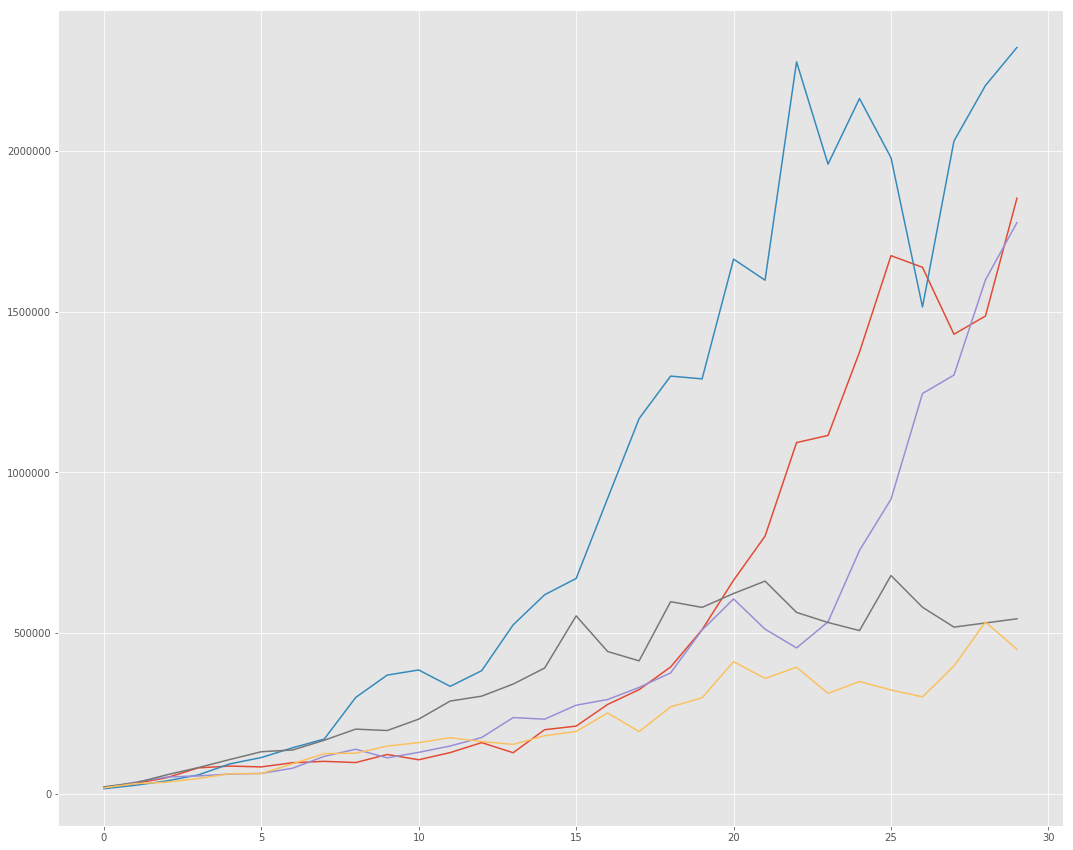

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 15
plots.plot(sim[first_five])

In [25]:
print('Count:', len(sim.loc[29]))
print('Mean:',locale.currency(np.mean(sim.loc[29]), grouping=True))
print('SD:',locale.currency(np.std(sim.loc[29]), grouping=True))
print('Max:',locale.currency(np.max(sim.loc[29]), grouping = True))
print('Min:', locale.currency(np.min(sim.loc[29]), grouping = True))


Count: 5000
Mean: $1,498,142.64
SD: $1,146,839.92
Max: $13,767,307.31
Min: $73,981.13


In [26]:
ending_values = sim.loc[29]
ending_values.describe() 

count    5.000000e+03
mean     1.498143e+06
std      1.146955e+06
min      7.398113e+04
25%      7.400658e+05
50%      1.180588e+06
75%      1.868327e+06
max      1.376731e+07
Name: 29, dtype: float64

(array([ 19., 130., 289., 434., 428., 410., 378., 390., 321., 287., 248.,
        217., 182., 173., 122., 116., 103.,  89.,  69.,  73.,  46.,  55.,
         38.,  48.,  31.,  36.,  25.,  32.,  20.,  24.,  18.,  12.,  20.,
         11.,  11.,  12.,   7.,   6.,   6.,   9.,   4.,   3.,   2.,   5.,
          1.,   3.,   3.,   1.,   0.,   2.,   3.,   3.,   2.,   3.,   1.,
          1.,   3.,   0.,   3.,   0.,   1.,   5.,   0.,   1.,   0.,   0.,
          0.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   73981.13  ,   210914.3918,   347847.6536,   484780.9154,
          621714.1772,   758647.439 ,   895580.7008,  1032513.9626,
         1169447.2244,  1306380.4862,  1443313.748 ,  1580247.0098,
         1717180.2716,  1854113.5334,  1991046.7952,  2127980.057 ,
         2264913.3188,  2401846.5806,  2538779

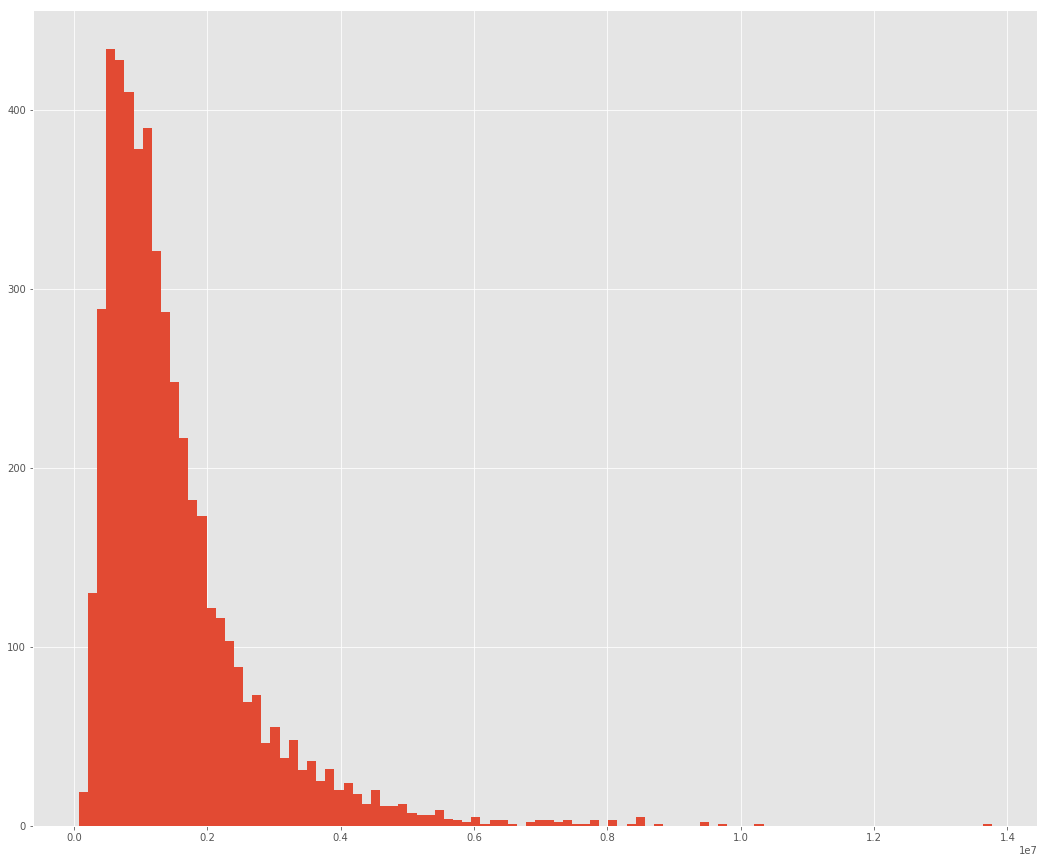

In [28]:
plots.hist(ending_values, bins = 100)

In [31]:
len(ending_values[ending_values> 1000000]) /len(ending_values)

0.5996

In [35]:
len(ending_values[(ending_values> 800000) & (ending_values< 1100000)]) /len(ending_values)

0.17

In [40]:
p_tiles = np.percentile(ending_values, [5,10,15,25,75,85,90, 95])
for p in range(len(p_tiles)):
    l = [5,10,15,25,75,85,90,95]
    print('{}%-ile: '.format(l[p]).rjust(15), '{}'.format(locale.currency(p_tiles[p], grouping=True)))

       5%-ile:  $406,501.26
      10%-ile:  $507,117.07
      15%-ile:  $580,658.11
      25%-ile:  $740,065.78
      75%-ile:  $1,868,326.77
      85%-ile:  $2,406,118.23
      90%-ile:  $2,857,408.80
      95%-ile:  $3,716,789.29
